1. Hypothesis 1-Top 10 Keto recipes
2. Hypothesis 2-The highest contributing ingredients are Sugar,salt,purpose flour
3. Hypothesis 3-Top 50 least time consuming recipes


In [1]:
#Installing the required packages and libraries
!pip install gdown
!python -m spacy download en_core_web_sm
!pip install nltk
!pip install wordcloud

from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import gdown
import spacy
import re
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import ast
from itertools import chain
from fractions import Fraction
import unicodedata
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings("ignore")


     --------------------------------------- 12.8/12.8 MB 27.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#Importing the first recipe dataset from google drive
url = 'https://drive.google.com/uc?id=1K2J4GryH4OyzFYyjfCeCjbRPNhugb1DH'
output = 'Project_3.csv'
gdown.download(url, output, quiet=False)

df=pd.read_csv("Project_3.csv")

Downloading...
From: https://drive.google.com/uc?id=1K2J4GryH4OyzFYyjfCeCjbRPNhugb1DH
To: C:\Users\Administrator\Downloads\Project_3.csv
100%|██████████| 1.64M/1.64M [00:00<00:00, 20.0MB/s]


In [3]:
#Importing the second recipe dataset from google drive
url1 = 'https://drive.google.com/uc?id=1MBhfHXuoBZ6YccOuujdcrUEFAw6W__oD'
output1 = 'Project_3_1.csv'
gdown.download(url1, output1, quiet=False)

df2=pd.read_csv("Project_3_1.csv")

Downloading...
From: https://drive.google.com/uc?id=1MBhfHXuoBZ6YccOuujdcrUEFAw6W__oD
To: C:\Users\Administrator\Downloads\Project_3_1.csv
100%|██████████| 94.0k/94.0k [00:00<00:00, 3.08MB/s]


In [4]:
df

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1085,Date-Nut Balls,15 mins,10 mins,30 mins,48,4 dozen balls,"14 tablespoons butter, 1 cup pitted chopped da...",Melt butter in a saucepan over medium heat; co...,3.8,https://www.allrecipes.com/recipe/240653/date-...,/Desserts/Cookies/Fruit Cookie Recipes/Date/,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...","Prep Time: 15 mins, Cook Time: 10 mins, Additi...",https://www.allrecipes.com/thmb/LXm_15zLymhZ7c...
1086,1086,Jamaica Cake,NaN,NaN,NaN,14,1 - 13x9 inch pan,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...","Mix together sugar, vegetable oil, pecans, flo...",4.6,https://www.allrecipes.com/recipe/7509/jamaica...,/Desserts/Fruit Desserts/Banana Dessert Recipes/,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...","Servings: 14, Yield: 1 - 13x9 inch pan",https://www.allrecipes.com/thmb/tI7g5xY5-qPV5v...
1087,1087,Best Hot Sauce,10 mins,20 mins,30 mins,100,2 cups,"10 fresh hot chile peppers, stems removed, 1 ...","Place peppers, onion, dates, basil, parsley, t...",4.9,https://www.allrecipes.com/recipe/242153/best-...,/Side Dish/Sauces and Condiments/,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...","Prep Time: 10 mins, Cook Time: 20 mins, Total ...",https://www.allrecipes.com/thmb/80wUYzFvbycfxx...
1088,1088,Moist Date Nut Bread,15 mins,50 mins,1 hrs 35 mins,12,1 9x5-inch loaf,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",Preheat the oven to 350 degrees F (175 degrees...,4.5,https://www.allrecipes.com/recipe/51446/moist-...,/Breakfast and Brunch/Breakfast Bread Recipes/,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...","Prep Time: 15 mins, Cook Time: 50 mins, Additi...",https://www.allrecipes.com/thmb/bYsnompJZ6UAF9...


In [5]:
df["recipe_name"].duplicated().value_counts() #Checking for any duplicate entries

False    961
True     129
Name: recipe_name, dtype: int64

In [6]:
#A basic description of the dataset, it is observed that serving size is as high as 961, we may explore on it further
df.describe()


,Unnamed: 0,servings,rating
count,1090.000000,1090.000000,1090.000000
mean,544.500000,13.755046,4.533853
std,314.800201,19.886076,0.349814
min,0.000000,1.000000,2.000000
25%,272.250000,6.000000,4.400000
50%,544.500000,8.000000,4.600000
75%,816.750000,12.000000,4.700000
max,1089.000000,240.000000,5.000000


In [7]:
df=df.drop_duplicates(subset=["recipe_name","ingredients"]).reset_index(drop=True)

In [8]:
#Checking the number of null values in each column
df.isnull().sum()

Unnamed: 0        0
recipe_name       0
prep_time        47
cook_time       289
total_time       41
servings          0
yield           167
ingredients       0
directions        0
rating            0
url               0
cuisine_path      0
nutrition         0
timing            0
img_src           0
dtype: int64

In [9]:
#Dropping the yield column since its similar to the servings
#Dropping the cook_time and prep_time
df.drop(['prep_time','cook_time','yield'], axis=1, inplace=True)

In [10]:
#Creating new dataframes to store the total_time taken for the recipe for visualization
df1_recipes=pd.DataFrame()
df2_recipes=pd.DataFrame()

In [11]:
#Creating a function to convert the total_time to mins as they are in different formats(On both datasets)
def convert(x):
    if x is None:
        return np.nan
    else:
        x=str(x)
        lst=x.split(" ")
        time=0
        if "days" in lst:
            time+=int(lst[lst.index("days") - 1])*60*24
        if "hrs" in lst:
            time+=int(lst[lst.index("hrs") - 1])*60
        if "mins" in lst:
            time+=int(lst[lst.index("mins") - 1])
        return time         

In [12]:
df2_recipes["Total Time"]=df2["Total Time"].apply(convert)

In [13]:
df1_recipes["total_time"]=df["total_time"].apply(convert)

In [14]:
df2_recipes.head(10)

,Total Time
0,60
1,40
2,65
3,20
4,35
5,30
6,45
7,170
8,45
9,45


In [15]:
df1_recipes.head()

,total_time
0,0
1,90
2,25
3,75
4,160


In [16]:
#Cuisine is extracted from the cuisne path column to extract the exact dataset
new_cuisine=[]
for index,row in df.iterrows():
    if (row['cuisine_path'].partition('/')[2].partition('/')[0]) !="Cuisine":
         val= row['cuisine_path'].partition('/')[2].partition('/')[0]
         new_cuisine.append(val)
    else:
        val2=row['cuisine_path'].partition('/')[2].partition('/')[2].partition('/')[0]
        new_cuisine.append(val2)
df["Cuisines"]=new_cuisine      

In [17]:
#Outlier analysis to check the values that have a higher serving_size,Since its of side-dishes no further analysis is required
df["Cuisines"][df["servings"]>70].value_counts()

Side Dish         16
Desserts           4
Drinks Recipes     1
Name: Cuisines, dtype: int64

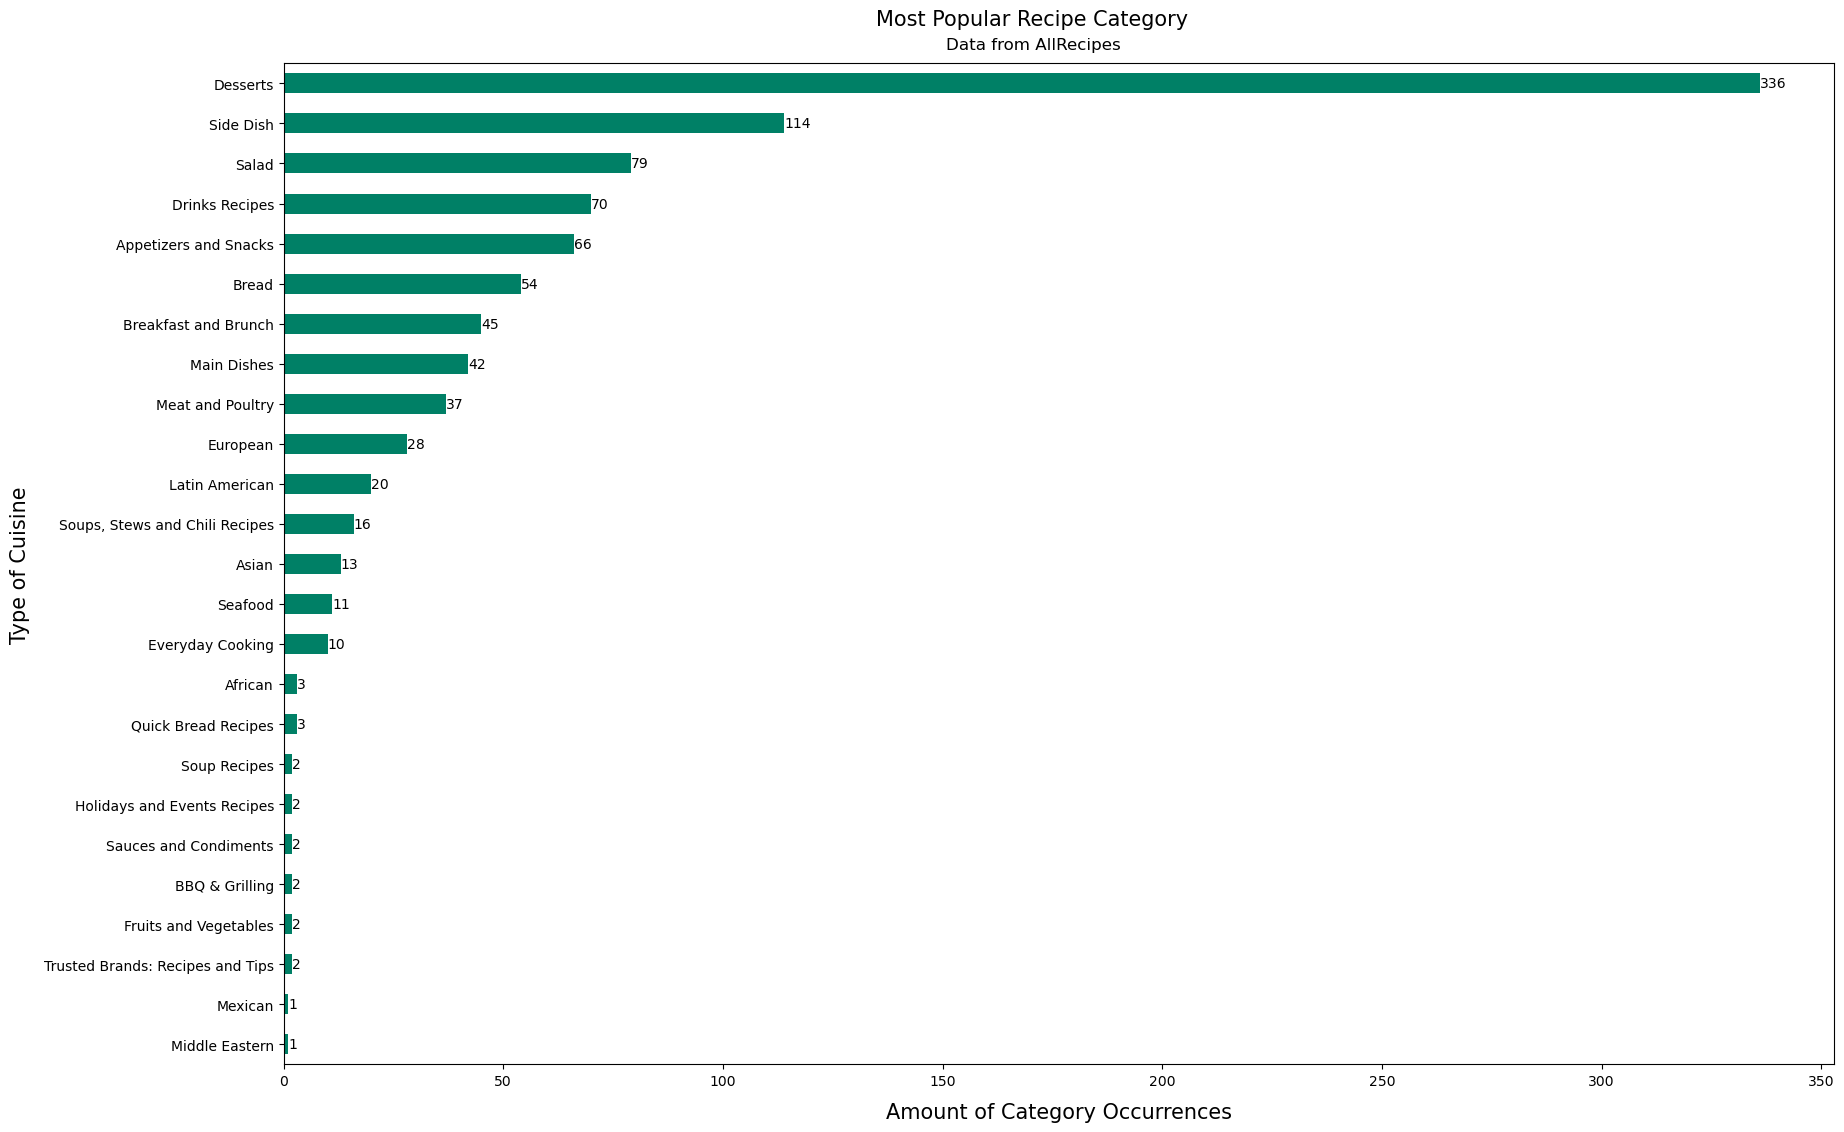

In [18]:
#Doing a basic visualization to understand themost popular recipe category
plt.title('Most Popular Recipe Category', y=1.03, x=0.483, fontsize=15)
plt.suptitle('Data from AllRecipes', y=0.90)

ax = (
    df["Cuisines"]
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind='barh', figsize=(20, 13),colormap="summer")
)
ax.bar_label(ax.containers[0])  # bar annotation

plt.xlabel('Amount of Category Occurrences', labelpad=10, fontsize=15)
plt.ylabel('Type of Cuisine', labelpad=10, fontsize=15)
plt.show()

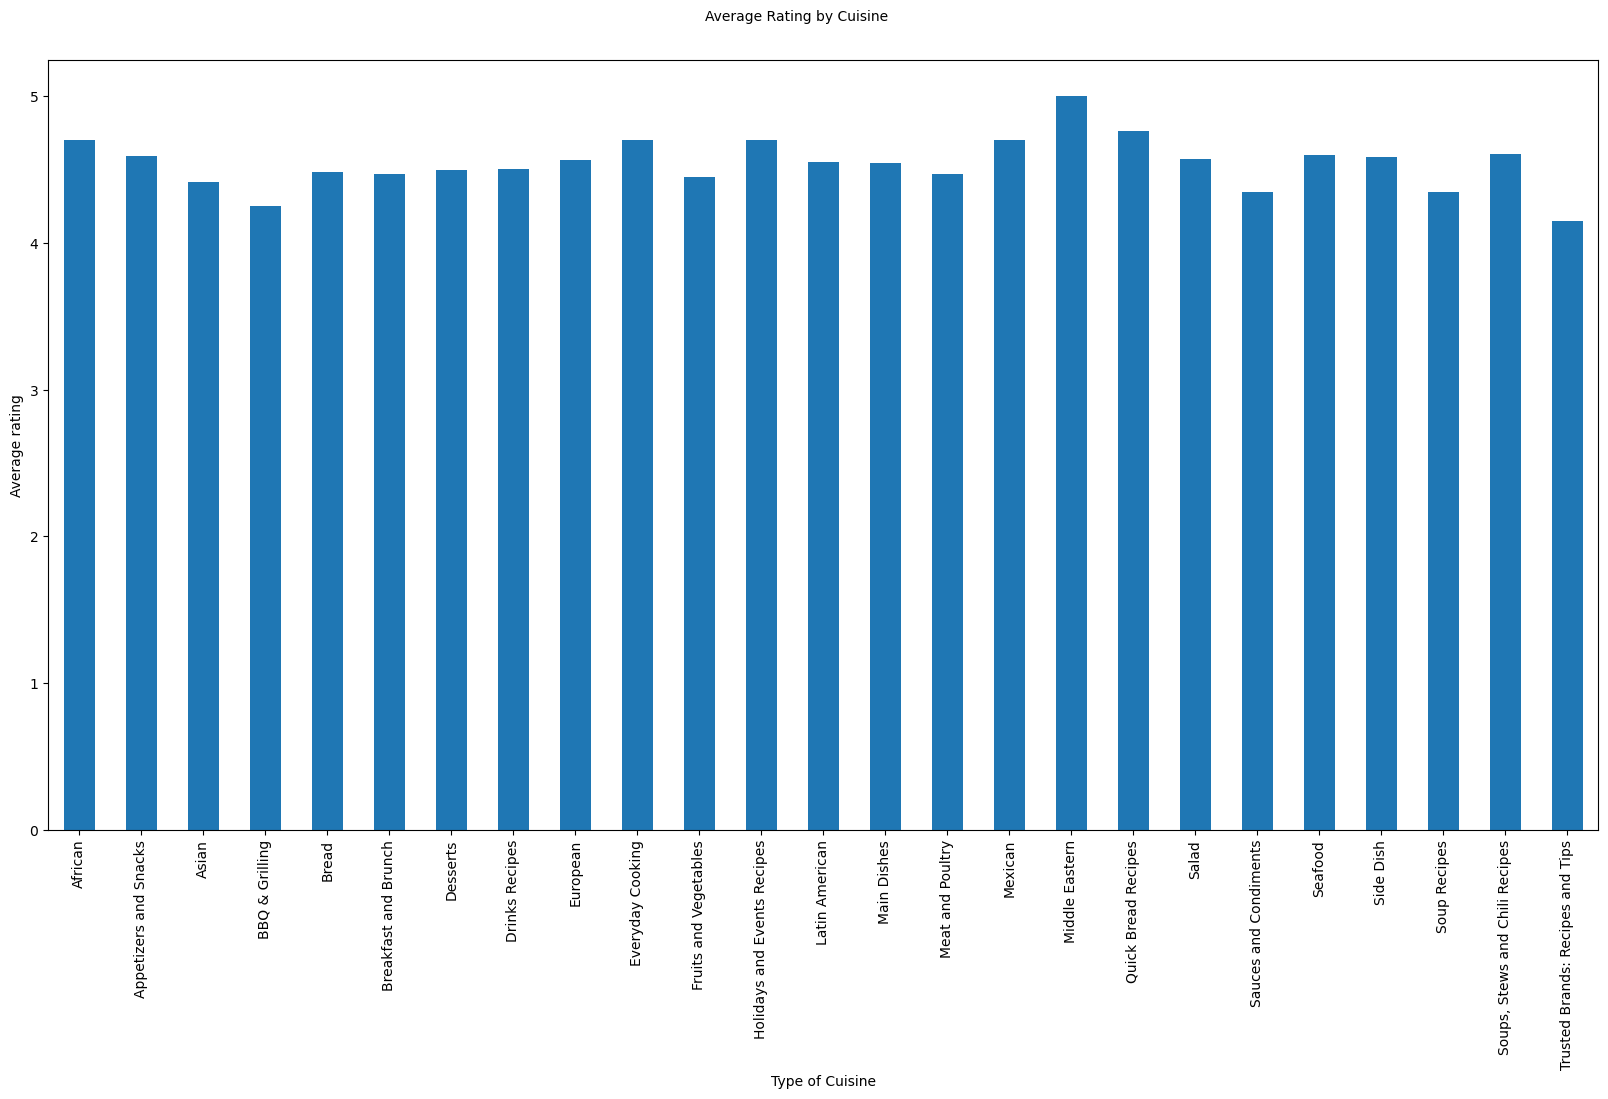

In [19]:

rating=df.groupby(["Cuisines"])['rating'].mean()
fontsize=20
plt.rcParams["figure.figsize"] = (20,10)
rating.plot(kind="bar",stacked=True)
plt.title('Average Rating by Cuisine', y=1.04, x=0.483, fontsize=10)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Type of Cuisine')
plt.ylabel('Average rating')
plt.show()


In [20]:
#The below program is created to extract the nutritional types and their corrresponding values(A seprste mg/g col will be created for the same nutritional type if it exisits)
amount = 0
amountString = ""
name = ""
nutrition = pd.DataFrame()
nutrition["recipe_name"] = df["recipe_name"]
nutrition["rating"] = df["rating"]
for i, recipe in df.iterrows():
    stuff = recipe["nutrition"].split(", ")
    for nutrient in stuff:
        words = nutrient.split(" ")
        name = ""
        for word in words:
            if word[-1] == 'g':
                if word[-2] == 'm':
                    amount = int(word[:-2])
                    name += "(mg)"
                else: 
                    amount = int(word[:-1])
                    name += "(g)"
                amountString = word
            elif word[-1] != '%':
                name += word + "-"
        #print(name)
        #print(amountString)
        name = name.strip()
        if name in nutrition.columns:
            nutrition[name][i] = amount
        else:
            nutrition[name] = 0
            nutrition[name][i] = amount

In [21]:
nutrition

,recipe_name,rating,Total-Fat-(g),Saturated-Fat-(g),Cholesterol-(mg),Sodium-(mg),Total-Carbohydrate-(g),Dietary-Fiber-(g),Total-Sugars-(g),Protein-(g),Vitamin-C-(mg),Calcium-(mg),Iron-(mg),Potassium-(mg)
0,Apple-Cranberry Crostada,4.4,18,7,19,128,60,5,40,4,8,35,1,245
1,Apple Pie by Grandma Ople,4.8,19,9,31,124,52,3,0,2,5,23,1,156
2,Sarah's Homemade Applesauce,4.8,0,0,0,3,32,4,27,0,6,13,0,150
3,Apple Crisp,4.7,8,5,20,98,61,3,44,2,4,36,1,162
4,Apple Pie Filling,4.7,0,0,0,61,33,1,28,0,3,7,0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,Date-Nut Balls,3.8,5,2,9,33,8,1,7,0,1,4,1,32
957,Jamaica Cake,4.6,33,4,40,272,61,3,37,6,5,25,2,201
958,Best Hot Sauce,4.9,1,0,0,29,1,0,0,0,11,2,0,21
959,Moist Date Nut Bread,4.5,10,3,26,365,47,4,30,4,0,51,2,312


In [22]:
keto_meal=nutrition.sort_values(
    by="Total-Fat-(g)",
    ascending=False).sort_values(by="Total-Carbohydrate-(g)",ascending=True).head(20)

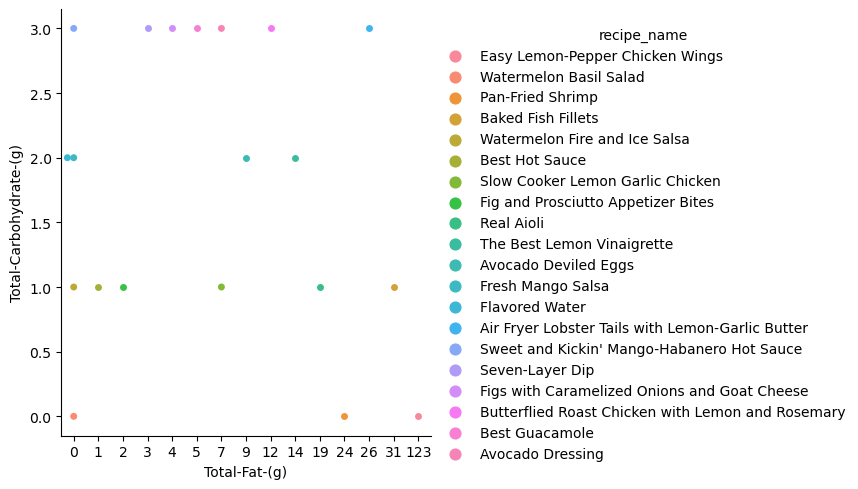

In [23]:
#Suggestion for top 10 recipes in Keto meal
sns.catplot(data=keto_meal, x="Total-Fat-(g)", y="Total-Carbohydrate-(g)", hue="recipe_name", kind="swarm")

In [24]:
#Making 4 quartilies to understand the distribution of the nutritional intormation(Macro-nutrients) based on ratings
q = nutrition.quantile([0.00, 0.25, 0.50, 0.75, 1.00])

#print(q)

df_nutri = nutrition.copy()
df_nutri.drop(['recipe_name', 'Sodium-(mg)','Potassium-(mg)','Saturated-Fat-(g)','Total-Carbohydrate-(g)','Cholesterol-(mg)', 'Vitamin-C-(mg)', 'Calcium-(mg)', 'Iron-(mg)'], axis = 1, inplace=True)
#print(df)
col = 'rating'
qcol = 'rating'

q1 = df_nutri[((df_nutri[col]>=q[qcol][0.00]) & (df_nutri[col]<q[qcol][0.25]))]
q1.drop(['rating'], axis = 1, inplace=True)
q2 = df_nutri[((df_nutri[col]>=q[qcol][0.25]) & (df_nutri[col]<q[qcol][0.50]))]
q2.drop(['rating'], axis = 1, inplace=True)
q3 = df_nutri[((df_nutri[col]>=q[qcol][0.50]) & (df_nutri[col]<q[qcol][0.75]))]
q3.drop(['rating'], axis = 1, inplace=True)
q4 = df_nutri[((df_nutri[col]>=q[qcol][0.75]) & (df_nutri[col]<=q[qcol][1.00]))]
q4.drop(['rating'], axis = 1, inplace=True)

([<matplotlib.patches.Wedge at 0x2cc88c96490>,
 [Text(0.6498608501051457, 0.8875138734130399, 'Total-Fat-(g)'),
  Text(-0.5193643169269552, 0.9696704111722692, 'Dietary-Fiber-(g)'),
  Text(-0.888389817505791, -0.6486628802020564, 'Total-Sugars-(g)'),
  Text(0.9689688407739132, -0.5206720518803166, 'Protein-(g)')],
 [Text(0.3544695546028067, 0.4840984764071126, '29.9%'),
  Text(-0.2832896274147028, 0.5289111333666922, '5.9%'),
  Text(-0.48457626409406773, -0.3538161164738489, '48.5%'),
  Text(0.5285284586039526, -0.2840029373892636, '15.7%')])

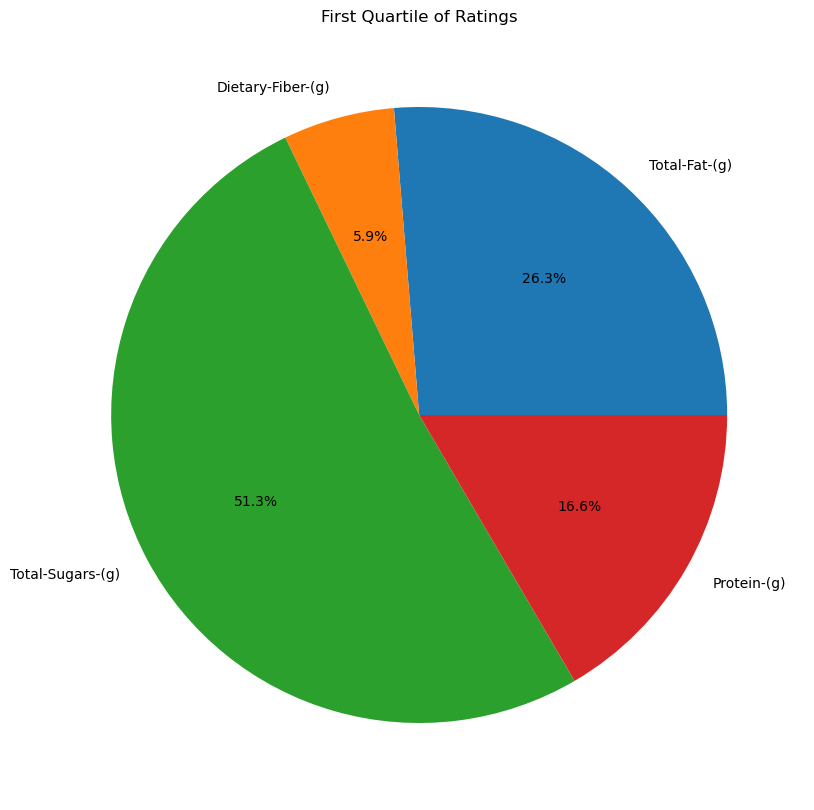

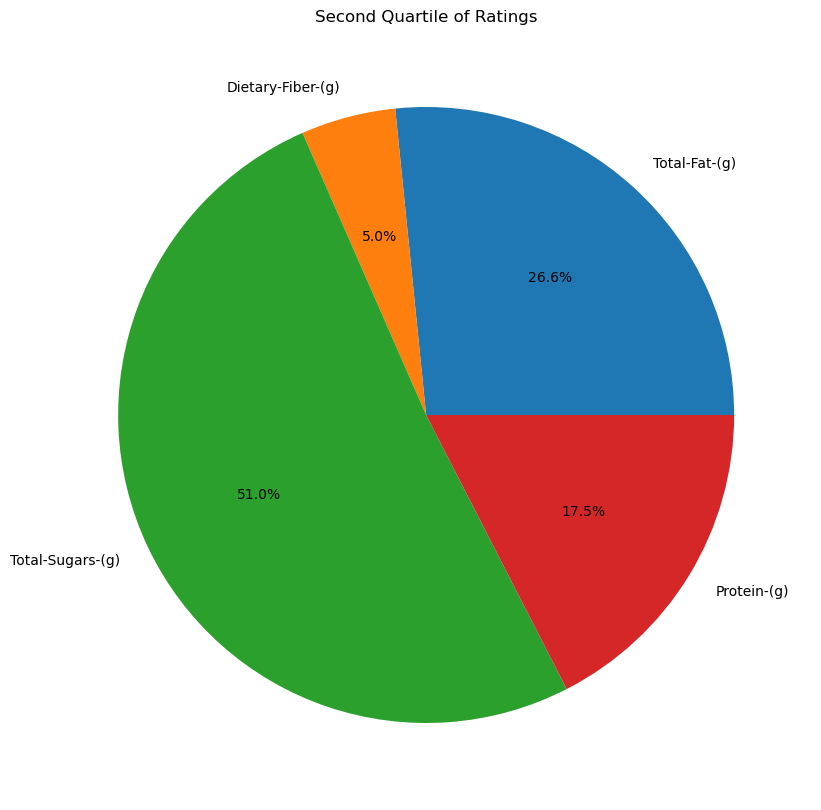

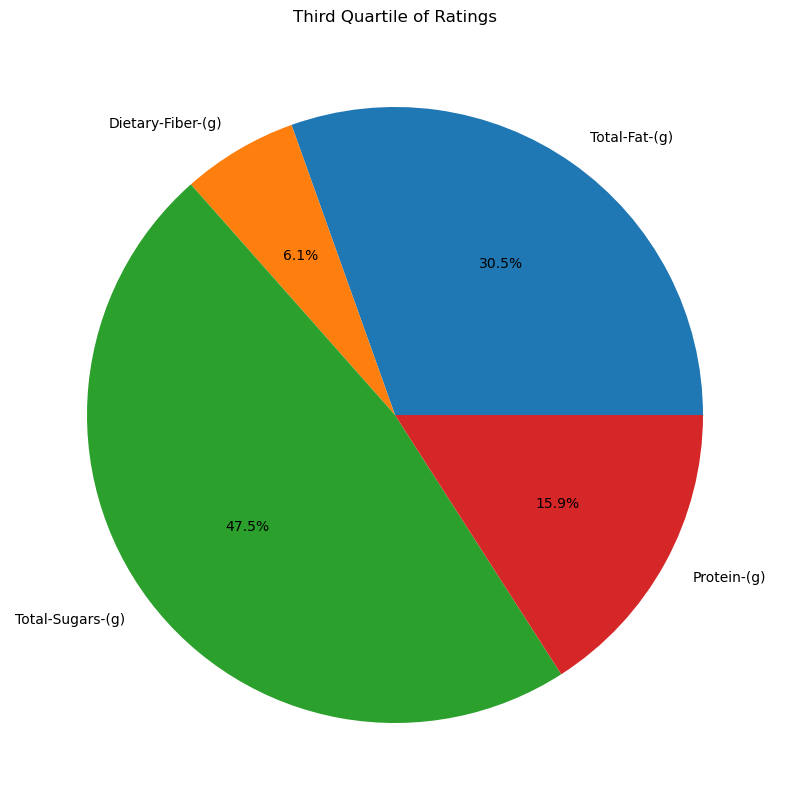

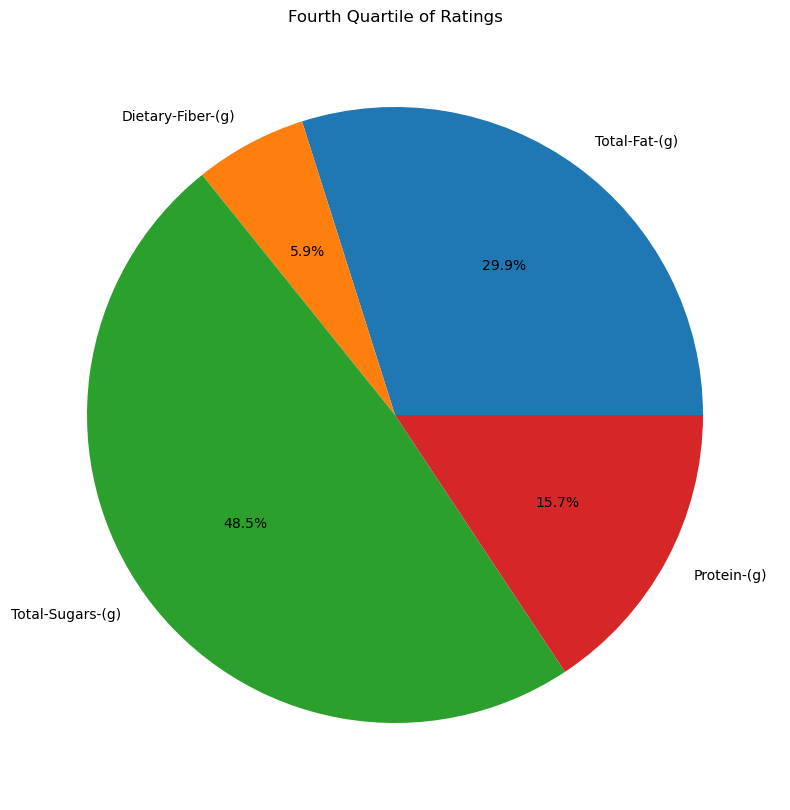

In [25]:
#Pie-chart is plotted for the same visualization
plt.title("First Quartile of Ratings")
plt.pie(q1.sum(), labels=q1.columns, radius = 1,autopct='%1.1f%%')
plt.figure()
plt.title("Second Quartile of Ratings")
plt.pie(q2.sum(), labels=q2.columns, radius = 1,autopct='%1.1f%%')
plt.figure()
plt.title("Third Quartile of Ratings")
plt.pie(q3.sum(), labels=q3.columns, radius = 1,autopct='%1.1f%%')
plt.figure()
plt.title("Fourth Quartile of Ratings")
plt.pie(q4.sum(), labels=q4.columns, radius = 1,autopct='%1.1f%%')

In [26]:
df = df.explode("nutrition")
df["ingredients"] = df["ingredients"].str.split(",")
df = df.explode('ingredients') 
df["ingredients"] 

0                              3 tablespoons butter
0       2 pounds Granny Smith apples (or other firm
0                                     crisp apples)
0                                            peeled
0                                         quartered
                           ...                     
960                     2 teaspoons vanilla extract
960                      1 tablespoon cold espresso
960                    or more as needed (or water)
960                          ½ teaspoon kosher salt
960                          ½ pinch cayenne pepper
Name: ingredients, Length: 9771, dtype: object

In [27]:
import unicodedata
unicodedata.numeric(u'¼')
unicodedata.name(u'¼')

agre = pd.DataFrame(columns=['Amount', 'Item'])
potato = 0

#convert vulgar fractions
for ix, row in df.iterrows():
    str = row["ingredients"]
    chunks = str.split(" ")
    #print(chunks)
    chunkSum = 0
    chunkString = ""
    hasNum = False
    for chunk in chunks:
        if len(chunk) > 0:
            if unicodedata.name(chunk[0]).startswith('VULGAR FRACTION'):
                normalized = unicodedata.normalize('NFKC', chunk)
                numerator, _slash, denominator = normalized.partition('⁄')
                val = float(numerator)/float(denominator)
                chunkSum += val
                #print(chunk)
                hasNum = True
            elif chunk.isdigit():
                chunkSum += float(chunk)
                hasNum = True
            else:
                chunkString += " " + chunk
        chunkString = chunkString.strip()
    if hasNum:
        agre.loc[len(agre.index)] = [chunkSum,chunkString]

In [28]:
agre

,Amount,Item
0,3.0,tablespoons butter
1,2.0,pounds Granny Smith apples (or other firm
2,1.0,pound Macintosh apples (or other soft-textured...
3,0.5,cup sugar
4,0.5,cup dried cranberries
...,...,...
7680,0.5,cup unsweetened shredded coconut
7681,2.0,teaspoons vanilla extract
7682,1.0,tablespoon cold espresso
7683,0.5,teaspoon kosher salt


In [29]:
SEPARATOR_RE = re.compile(r'^([\d\s*[\d\.,/]*)\s*(.+)')


def normalize(st):
    return re.sub(r'\s+', ' ', SEPARATOR_RE.sub('\g<1> \g<2>', st)).strip()


def escape_re_string(text):
    text = text.replace('.', '\.')
    return re.sub(r'\s+', ' ', text)

UNITS = {"cup": ["cups", "cup", "c.", "c"], "fluid_ounce": ["fl. oz.", "fl oz", "fluid ounce", "fluid ounces"],
         "gallon": ["gal", "gal.", "gallon", "gallons"], "ounce": ["oz", "oz.", "ounce", "ounces"],
         "pint": ["pt", "pt.", "pint", "pints"], "pound": ["lb", "lb.", "pound", "pounds"],
         "quart": ["qt", "qt.", "qts", "qts.", "quart", "quarts"],
         "tablespoon": ["tbsp.", "tbsp", "T", "T.", "tablespoon", "tablespoons", "tbs.", "tbs"],
         "teaspoon": ["tsp.", "tsp", "t", "t.", "teaspoon", "teaspoons"],
         "gram": ["g", "g.", "gr", "gr.", "gram", "grams"], "kilogram": ["kg", "kg.", "kilogram", "kilograms"],
         "liter": ["l", "l.", "liter", "liters"], "milligram": ["mg", "mg.", "milligram", "milligrams"],
         "milliliter": ["ml", "ml.", "milliliter", "milliliters"], "pinch": ["pinch", "pinches"],
         "dash": ["dash", "dashes"], "touch": ["touch", "touches"], "handful": ["handful", "handfuls"],
         "stick": ["stick", "sticks"], "clove": ["cloves", "clove"], "can": ["cans", "can"], "large": ["large"],
         "small": ["small"], "scoop": ["scoop", "scoops"], "filets": ["filet", "filets"], "sprig": ["sprigs", "sprig"]}
NUMBERS = ['17', '18', '13', '19', '14', '16', '15', '17', '12',
           '11', '80', '30', '90', '20', '7', '50', '60', '40', '3', '8',
           '4', '0', '5', '9', '10', '1', '6', '2', 'an','1/4','1/2']

In [30]:
a = list(chain.from_iterable(UNITS.values()))
a.sort(key=lambda x: len(x), reverse=True)
a = map(escape_re_string, a)
prepositions = ["of"]

In [31]:
PARSER_RE = re.compile(
    r'(?P<NUMBERS>(?:[\d\.,][\d\.,\s/]*)?\s*(?:(?:%s)\s*)*)?(\s*(?P<UNIT>%s)\s+)?(\s*(?:%s)\s+)?(\s*(?P<Name>.+))?' % ('|'.join(NUMBERS), '|'.join(a), '|'.join(prepositions)))

In [32]:
df11 = agre["Item"].str.extract(PARSER_RE, expand=False).drop(columns=[1,3,4])
df11["NUMBERS"]=agre["Amount"]

In [33]:
df11

,NUMBERS,UNIT,Name
0,3.0,tablespoons,butter
1,2.0,pounds,Granny Smith apples (or other firm
2,1.0,pound,Macintosh apples (or other soft-textured apple...
3,0.5,cup,sugar
4,0.5,cup,dried cranberries
...,...,...,...
7680,0.5,cup,unsweetened shredded coconut
7681,2.0,teaspoons,vanilla extract
7682,1.0,tablespoon,cold espresso
7683,0.5,teaspoon,kosher salt


In [35]:
base_model = spacy.load('en_core_web_sm')

In [36]:
df11["Name"]=df11["Name"].apply(lambda row: " ".join([w.lemma_ for w in base_model(row)]))

In [37]:
df11

,NUMBERS,UNIT,Name
0,3.0,tablespoons,butter
1,2.0,pounds,Granny Smith apple ( or other firm
2,1.0,pound,Macintosh apple ( or other soft - textured app...
3,0.5,cup,sugar
4,0.5,cup,dry cranberry
...,...,...,...
7680,0.5,cup,unsweetene shredded coconut
7681,2.0,teaspoons,vanilla extract
7682,1.0,tablespoon,cold espresso
7683,0.5,teaspoon,kosher salt


In [38]:
#load the existing small model from spacy, to get the meaningful ingredients list out of the entire ingredients description,
def cleaning(df,col_value,col_value_new):
            base_model = spacy.load('en_core_web_sm')
            
            measurements = re.compile(r'(bowl|bulb|cube|clove|cup|drop|ounce|oz|pinch|pound|teaspoon|tablespoon|large|small)s?')
            extracted = []
            
            for ix, row in df.iterrows():
                print('\r', "Extracting ingredient for row", ix, end='')
                tokens = base_model(row[col_value])
                extract = ''
                for token in tokens:
                    if (token.dep_ in ['nsubj', 'ROOT']) and (token.pos_ in ['NOUN', 'PROPN']) and (not measurements.match(token.text)):
                    #explore children
                        for child in token.children:
                            if (not measurements.match(child.text)) and (child.dep_ in ['amod', 'compound']):
                                extract += child.text + ' '
                        extract += token.text + ' '
                extracted.append(extract)
                
            #convert to dataframe to view 
            df[col_value_new] = extracted
            
            nan_value = float("NaN")
            
            df.replace("", nan_value, inplace=True)
            
            df.dropna(subset = [col_value_new], inplace=True)

In [39]:
cleaning(df11,"Name","name")

 Extracting ingredient for row 7684

In [40]:
df11["name"].value_counts()

white sugar          507
salt                 297
purpose flour        269
butter               263
egg                  248
                    ... 
fresh lemon peel       1
shred zucchini         1
chop plum              1
alfalfa sprout         1
cold espresso          1
Name: name, Length: 1136, dtype: int64

In [41]:
count_df1=pd.DataFrame(df11.name.value_counts().rename_axis('Name').reset_index(name='count'))
count_df1.head(15)


,Name,count
0,white sugar,507
1,salt,297
2,purpose flour,269
3,butter,263
4,egg,248
5,ground cinnamon,208
6,vanilla extract,184
7,water,143
8,bake powder,124
9,bake soda,120


In [42]:
#A view of the second data
df2

,Row,Name,Prep Time,Cook Time,Total Time,Servings,Yield,Ingredients,Directions,url,Additional Time
0,0,Indian Chicken Curry (Murgh Kari),20 mins,40 mins,1 hrs,6,6 servings,"[{'quantity': '2', 'unit': 'pounds', 'name': '...",['Sprinkle the chicken breasts with 2 teaspoon...,https://www.allrecipes.com/recipe/212721/india...,NaN
1,1,Chicken Stir-Fry,20 mins,20 mins,40 mins,6,NaN,"[{'quantity': '4', 'unit': 'cups', 'name': 'wa...",['Bring water and rice to a boil in a saucepan...,https://www.allrecipes.com/recipe/223382/chick...,NaN
2,2,Jambalaya,20 mins,45 mins,1 hrs 5 mins,6,6 servings,"[{'quantity': '2', 'unit': 'tablespoons', 'nam...",['Heat 1 tablespoon of peanut oil in a large h...,https://www.allrecipes.com/recipe/31848/jambal...,NaN
3,3,Chicken Katsu,10 mins,10 mins,20 mins,4,4 servings,"[{'quantity': '4', 'unit': '', 'name': 'skinle...",['Season the chicken breasts on both sides wit...,https://www.allrecipes.com/recipe/72068/chicke...,NaN
4,4,Simple Baked Chicken Breasts,10 mins,25 mins,35 mins,4,NaN,"[{'quantity': '4', 'unit': '(5 ounce)', 'name'...",['Preheat the oven to 400 degrees F (200 degre...,https://www.allrecipes.com/recipe/240208/simpl...,NaN
5,5,Chicken Marsala,10 mins,20 mins,30 mins,4,4 servings,"[{'quantity': '¼', 'unit': 'cup', 'name': 'all...","['In a shallow dish or bowl, mix together the ...",https://www.allrecipes.com/recipe/8887/chicken...,NaN
6,6,Baked Garlic Parmesan Chicken,15 mins,30 mins,45 mins,6,6 servings,"[{'quantity': '2', 'unit': 'tablespoons', 'nam...",['Preheat oven to 350 degrees F (175 degrees C...,https://www.allrecipes.com/recipe/55860/baked-...,NaN
7,7,Asian Orange Chicken,20 mins,20 mins,2 hrs 50 mins,4,NaN,"[{'quantity': '1 ½', 'unit': 'cups', 'name': '...","['Combine water, rice vinegar, lemon juice, so...",https://www.allrecipes.com/recipe/61024/asian-...,2 hrs 10 mins
8,8,Chicken Quesadillas,20 mins,25 mins,45 mins,10,NaN,"[{'quantity': '1', 'unit': 'pound', 'name': 's...",['Preheat the broiler. Lightly grease a baking...,https://www.allrecipes.com/recipe/21659/chicke...,NaN
9,9,Chicken Cordon Bleu,10 mins,35 mins,45 mins,4,4 servings,"[{'quantity': '', 'unit': '', 'name': 'nonstic...",['Preheat oven to 350 degrees F (175 degrees C...,https://www.allrecipes.com/recipe/8495/chicken...,NaN


In [43]:
df2.describe()

,Row,Servings
count,59.000000,59.000000
mean,29.000000,5.491525
std,17.175564,2.184371
min,0.000000,2.000000
25%,14.500000,4.000000
50%,29.000000,6.000000
75%,43.500000,6.000000
max,58.000000,12.000000


In [44]:
df2.isna().sum()

Row                 0
Name                0
Prep Time           0
Cook Time           0
Total Time          0
Servings            0
Yield              44
Ingredients         0
Directions          0
url                 0
Additional Time    42
dtype: int64

In [45]:
#Extracting the ingredients, unit and quantity
dict_df = pd.DataFrame([ast.literal_eval(i) for i in df2.Ingredients.values])

In [46]:
dict_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"{'quantity': '2', 'unit': 'pounds', 'name': 's...","{'quantity': '2', 'unit': 'teaspoons', 'name':...","{'quantity': '½', 'unit': 'cup', 'name': 'cook...","{'quantity': '1 ½', 'unit': 'cups', 'name': 'c...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1 ½', 'unit': 'teaspoons', 'name...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': '(15 ounce) can', 'n...","{'quantity': '1', 'unit': 'cup', 'name': 'plai...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '½', 'unit': 'cup', 'name': 'water'}","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': 'tablespoon', 'name'..."
1,"{'quantity': '4', 'unit': 'cups', 'name': 'wat...","{'quantity': '2', 'unit': 'cups', 'name': 'whi...","{'quantity': '⅔', 'unit': 'cup', 'name': 'soy ...","{'quantity': '¼', 'unit': 'cup', 'name': 'brow...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '¼', 'unit': 'teaspoon', 'name': ...","{'quantity': '3', 'unit': '', 'name': 'skinles...","{'quantity': '2', 'unit': 'tablespoons', 'name...","{'quantity': '1', 'unit': 'head', 'name': 'bro...","{'quantity': '1', 'unit': '', 'name': 'onion, ...","{'quantity': '1', 'unit': 'cup', 'name': 'slic...","{'quantity': '1', 'unit': '(8 ounce) can', 'na...","{'quantity': '1', 'unit': '', 'name': 'green b...",None,None,None,None,None
2,"{'quantity': '2', 'unit': 'tablespoons', 'name...","{'quantity': '1', 'unit': 'tablespoon', 'name'...","{'quantity': '10', 'unit': 'ounces', 'name': '...","{'quantity': '1', 'unit': 'pound', 'name': 'bo...","{'quantity': '1', 'unit': '', 'name': 'onion, ...","{'quantity': '1', 'unit': 'small', 'name': 'gr...","{'quantity': '2', 'unit': 'stalks', 'name': 'c...","{'quantity': '3', 'unit': 'cloves', 'name': 'g...","{'quantity': '1', 'unit': '(16 ounce) can', 'n...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '2', 'unit': 'teaspoons', 'name':...","{'quantity': '1', 'unit': 'teaspoon', 'name': ...","{'quantity': '1 ¼', 'unit': 'cups', 'name': 'u...","{'quantity': '2 ½', 'unit': 'cups', 'name': 'c...",None,None,None
3,"{'quantity': '4', 'unit': '', 'name': 'skinles...","{'quantity': '', 'unit': '', 'name': 'salt and...","{'quantity': '2', 'unit': 'tablespoons', 'name...","{'quantity': '1', 'unit': '', 'name': 'egg, be...","{'quantity': '1', 'unit': 'cup', 'name': 'pank...","{'quantity': '1', 'unit': 'cup', 'name': 'oil ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"{'quantity': '4', 'unit': '(5 ounce)', 'name':...","{'quantity': '2', 'unit': 'tablespoons', 'name...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '1', 'unit': 'pinch', 'name': 'Cr...","{'quantity': '1', 'unit': 'tablespoon', 'name'...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,"{'quantity': '¼', 'unit': 'cup', 'name': 'all-...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '¼', 'unit': 'teaspoon', 'name': ...","{'quantity': '½', 'unit': 'teaspoon', 'name': ...","{'quantity': '4', 'unit': 'medium', 'name': 's...","{'quantity': '4', 'unit': 'tablespoons', 'name...","{'quantity': '4', 'unit': 'tablespoons', 'name...","{'quantity': '1', 'unit': 'cup', 'name': 'slic...","{'quantity': '½', 'unit': 'cup', 'name': 'Mars...","{'quant

In [47]:
Quantity=[]
UNIT_1=[]
NAME_1=[]

def frame(value,col):
    for i in range(0,20):
        for j in range(0,59):
            if dict_df.iloc[j,i] is None:
                col.append(np.nan)
            else:
                col.append(dict_df.iloc[j,i][value])            

In [48]:
frame("quantity",Quantity)

In [49]:
frame("unit",UNIT_1)

In [50]:
frame("name",NAME_1)

In [51]:
final_list=list(zip(Quantity, UNIT_1,NAME_1))

In [52]:
final_list

[('2', 'pounds', 'skinless, boneless chicken breast halves'),
 ('4', 'cups', 'water'),
 ('2', 'tablespoons', 'peanut oil, divided'),
 ('4',
  '',
  'skinless, boneless chicken breast halves - pounded to 1/2 inch thickness'),
 ('4', '(5 ounce)', 'skinless, boneless chicken breast halves'),
 ('¼', 'cup', 'all-purpose flour for coating'),
 ('2', 'tablespoons', 'olive oil'),
 ('1 ½', 'cups', 'water'),
 ('1', 'pound', 'skinless, boneless chicken breast, diced'),
 ('', '', 'nonstick cooking spray'),
 ('4', '', 'skinless, boneless chicken breast halves'),
 ('2', 'tablespoons', 'olive oil'),
 ('25',
  'ounces',
  'frozen cooked, breaded crispy chicken strips (such as Tyson®)'),
 ('½', 'cup', 'rice vinegar'),
 ('1', '(16 ounce) bottle', 'Italian-style salad dressing'),
 ('⅓', 'cup', 'honey'),
 ('4', '', 'skinless, boneless chicken breast halves'),
 ('1', 'pound', 'skinless, boneless chicken breast halves'),
 ('3', '', 'skinless, boneless chicken breasts'),
 ('1', '(16 ounce) package', 'bow tie 

In [53]:
Ingredients_subset_df = pd.DataFrame(final_list,columns=["NUMBERS","UNIT","name"])

In [54]:
Ingredients_subset_df.dropna(inplace=True)

In [55]:
cleaning(Ingredients_subset_df,"name","Name")

 Extracting ingredient for row 1121

In [56]:
Ingredients_subset_df

,NUMBERS,UNIT,name,Name
0,2,pounds,"skinless, boneless chicken breast halves",skinless
1,4,cups,water,water
2,2,tablespoons,"peanut oil, divided",peanut oil
4,4,(5 ounce),"skinless, boneless chicken breast halves",skinless
5,¼,cup,all-purpose flour for coating,purpose flour
...,...,...,...,...
934,1,cup,heavy cream,heavy cream
944,½,cup,water,water
946,2 ½,cups,chicken broth,chicken broth
1003,1,teaspoon,garam masala,garam masala


In [57]:
Ingredients_subset_df.drop(columns="name",inplace=True)

In [58]:
Ingredients_subset_df=Ingredients_subset_df.rename(columns={"Name": "name"})

In [59]:
total_ingre=pd.concat([df11,Ingredients_subset_df], axis=0)

In [60]:
total_ingre["NUMBERS"]=total_ingre["NUMBERS"].replace(["tablespoons", "pounds", "cups","ounces","fluid ounces","cloves","teaspoons"],["tablespoon", "pound", "cup","ounce","fluid ounce","clove","teaspoon"])

In [61]:
total_ingre

,NUMBERS,UNIT,Name,name
0,3.0,tablespoons,butter,butter
1,2.0,pounds,Granny Smith apple ( or other firm,Smith apple
2,1.0,pound,Macintosh apple ( or other soft - textured app...,Macintosh apple
3,0.5,cup,sugar,sugar
4,0.5,cup,dry cranberry,dry cranberry
...,...,...,...,...
934,1,cup,NaN,heavy cream
944,½,cup,NaN,water
946,2 ½,cups,NaN,chicken broth
1003,1,teaspoon,NaN,garam masala


In [62]:
total_ingre["name"].value_counts().head(10)

white sugar         510
salt                329
purpose flour       278
butter              275
egg                 254
ground cinnamon     211
vanilla extract     184
water               153
bake powder         124
bake soda           120
Name: name, dtype: int64

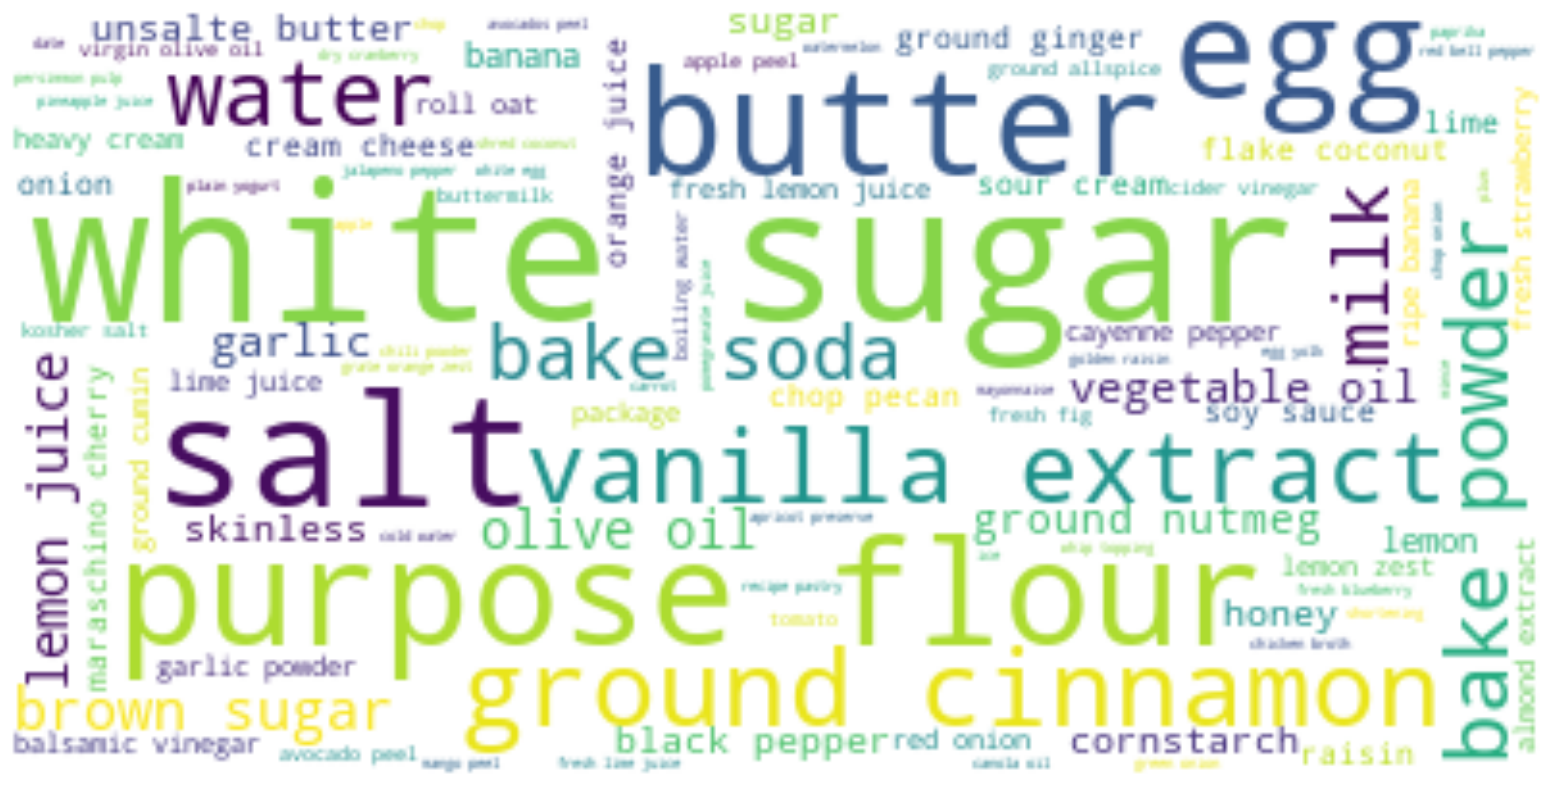

In [63]:
#The highest contributing ingredients are Sugar,salt,purpose flour
ingredient_counter = Counter(total_ingre["name"])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(ingredient_counter)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
#Joining the recipe name and servings to the total_time
extra_col1= (df["recipe_name"],df["servings"])
extra_col2= (df2["Name"],df2["Servings"])

In [65]:
df_time1 = df1_recipes.join(extra_col1)
df_time2 = df2_recipes.join(extra_col2)

In [76]:
df_time1=df_time1.drop_duplicates()

In [77]:
df_time2=df_time2.rename(columns={"Name": "recipe_name","Total Time": "total_time","Servings": "servings"})

In [78]:
df_time=pd.concat([df_time1,df_time2],axis=0)

In [89]:
df_time

,total_time,recipe_name,servings
0,0,Apple-Cranberry Crostada,8
1,90,Apple Pie by Grandma Ople,8
2,25,Sarah's Homemade Applesauce,4
3,75,Apple Crisp,12
4,160,Apple Pie Filling,40
...,...,...,...
54,435,Slow Cooker Chicken Taco Soup,8
55,80,Curry Stand Chicken Tikka Masala Sauce,6
56,280,Kabobs,10
57,40,Chef John's Homemade Chicken Noodle Soup,8


In [97]:
top=df_time[df_time.total_time!=0].sort_values(by=['total_time']).head(50)

In [98]:
top

,total_time,recipe_name,servings
814,4,Nectarine Blush,2
227,5,Fresh Orange Juice,3
525,5,Quick Banana Milkshake (Ice Cream Free),2
61,5,Old Fashioned Cocktail,1
791,5,Aileen's Punch,30
527,5,Strawberry Orange Banana Smoothie,1
187,5,Agua Fresca,2
115,5,Fig Smoothie,2
543,5,Supreme Green Smoothie,3
591,5,Summertime Mango Drink,4


Text(0, 0.5, 'Total time consumed in minutes')

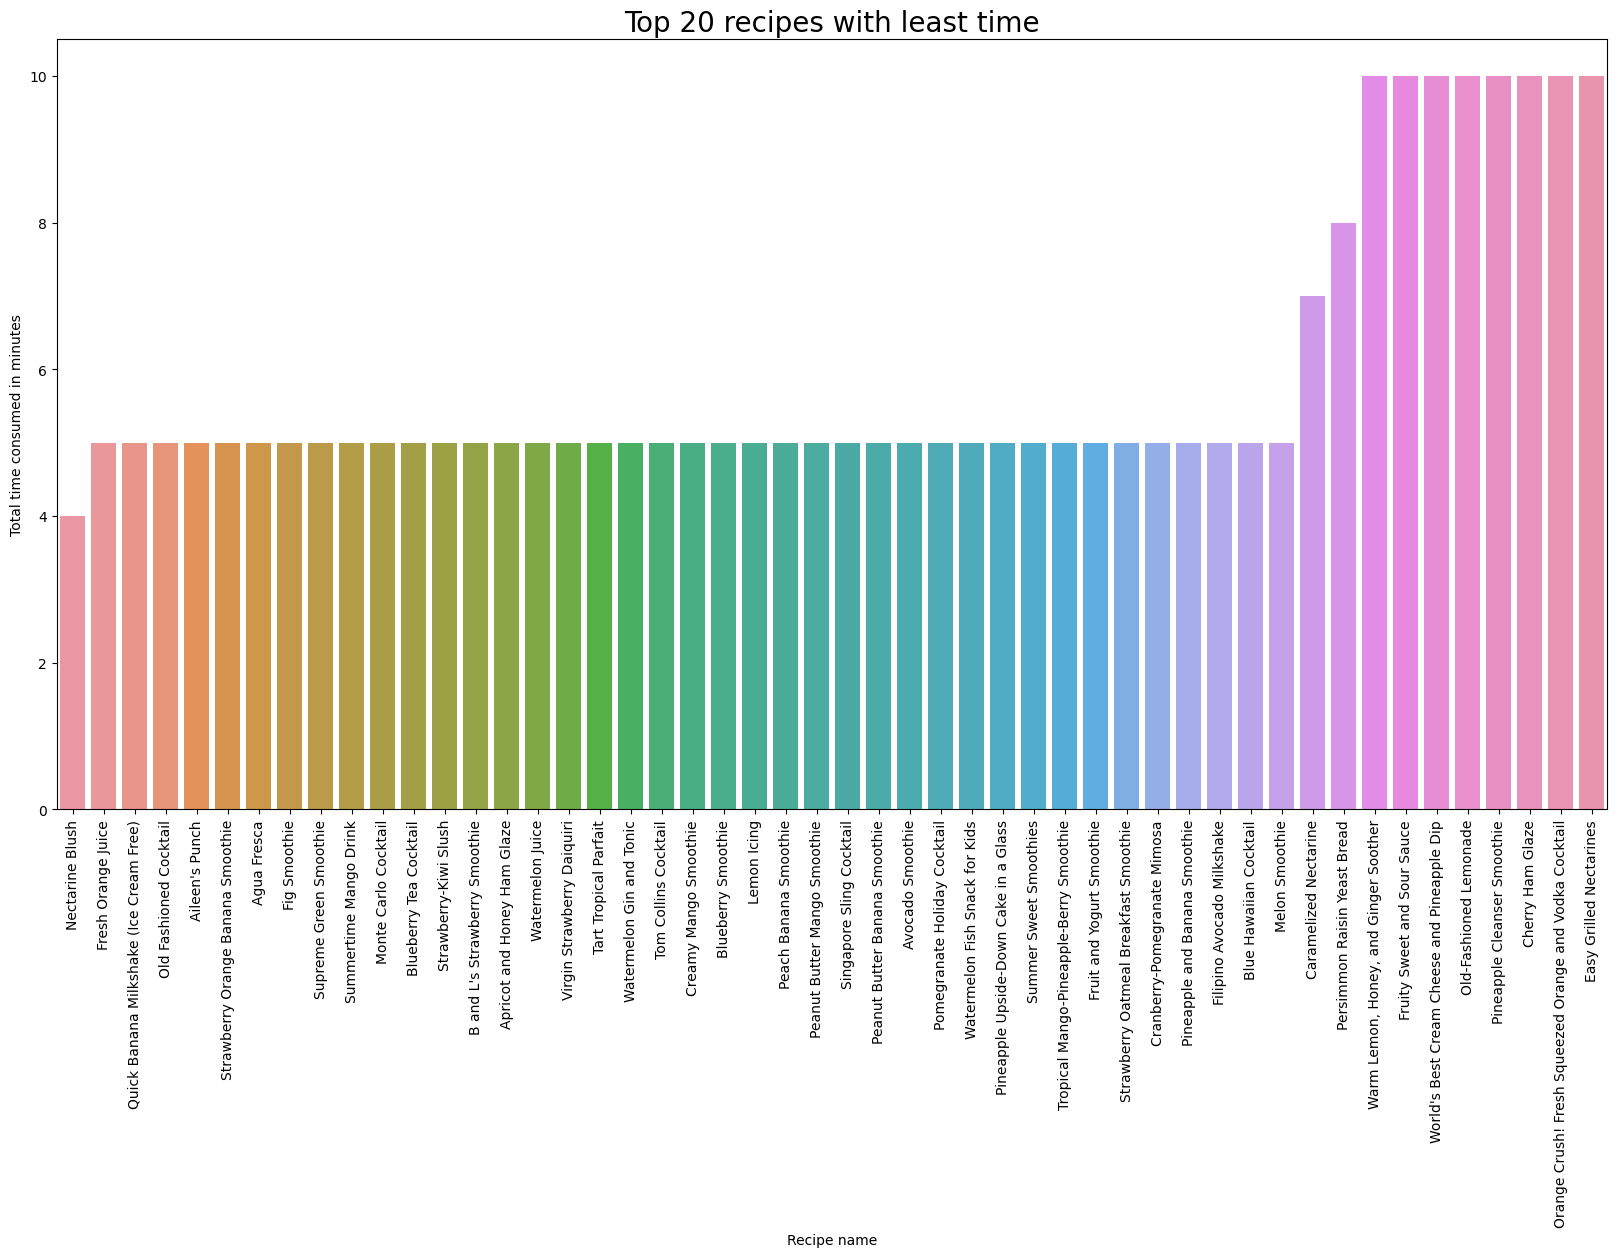

In [99]:
#Recipes that consume the least time
sns.barplot(x="recipe_name",y="total_time",data=top)
plt.title('Top 50 recipes with least time',fontdict={'fontsize': fontsize})
plt.xticks(rotation=90, ha='center')
plt.xlabel('Recipe name')
plt.ylabel('Total time consumed in minutes')